In [1]:
#Импорт библиотек машинного обучения
import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

print(tf.__version__)

2.0.0


In [2]:
#Размер обучающей выборки
n = 1500
#Инициализация счётчика случайных чисел 
#Указан определённый seed для постоянного результата
rnd.seed(4)
#Сторона квадрата
a = 10
#Радиус внутреннего круга
r = 4
#Центр круга
circle_x = 5
circle_y = 5

In [3]:
arr = np.zeros([n, 3])
print(arr.shape)
for i in range(0, n):
    x = a * rnd.random()
    y = a * rnd.random()
    res = 0
    if (x-circle_x) ** 2 + (y - circle_y) ** 2 < r ** 2:
        res = 1
    arr[i, 0] = x
    arr[i, 1] = y
    arr[i, 2] = res

(1500, 3)


In [4]:
# Отделение координат от результата попадания в круг
coords = arr[:,-3:2]

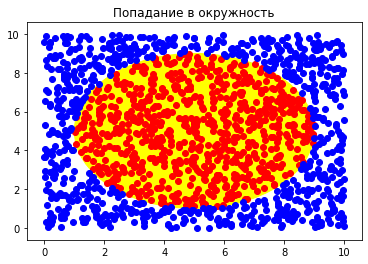

In [5]:
# Рисование графика
fig, ax = plt.subplots()
reds = []
blues = [] 
for i in arr:
    if i[2] == 1:
        reds.append(i)
    else:
        blues.append(i)
reds = np.array(reds)
blues = np.array(blues)
circle = plt.Circle((5, 5), 4, color='yellow', zorder=0)
ax.add_artist(circle)
ax.scatter(reds[:,0], reds[:,1], color='red')
ax.scatter(blues[:,0], blues[:,1], color='blue')


ax.set(title='Попадание в окружность')
plt.show()

In [6]:
# Создание модели для обучения
# Всего в моделе 2 полносвязных слоя 128 и 8 нейронов, а так же Dropoup слой
# Так же рабочая модель с одним скрытым слоем в 10 нейронов и фукцией активации tanh
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=2, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(8, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='relu'))

In [7]:
# Компиляция модели в качестве фунции потерь была выбрана binary_crossentropy
# ввиду, того что она дожходит для классификации в тех ситуациях, когда всего 2 варианта
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [8]:
# Перед обучением данные переопределены в отрезок [0,1]
inputs = arr[:,-3:2]/a
outputs = arr[:,2]
# Обучение производилось в 50 эпох  на процессоре
# так как оптимизации для видеокарты не нестроены
# это заняло примерно 10 секунд
# во втором варианте моделе 1 одним скрытым слоем
# производится увеличение количества эпох до 200
# и это занимает примерно такое же количество времени
model.fit(inputs, outputs, epochs=50)

Train on 1500 samples
Epoch 1/50
1500/1500 [==============================] - 1s 545us/sample - loss: 0.9040 - accuracy: 0.4800
Epoch 2/50
1500/1500 [==============================] - 0s 45us/sample - loss: 0.7288 - accuracy: 0.5493
Epoch 3/50
1500/1500 [==============================] - 0s 45us/sample - loss: 0.6455 - accuracy: 0.6087
Epoch 4/50
1500/1500 [==============================] - 0s 43us/sample - loss: 0.5705 - accuracy: 0.7007
Epoch 5/50
1500/1500 [==============================] - 0s 42us/sample - loss: 0.5397 - accuracy: 0.7493
Epoch 6/50
1500/1500 [==============================] - 0s 41us/sample - loss: 0.5025 - accuracy: 0.7573
Epoch 7/50
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4603 - accuracy: 0.7907
Epoch 8/50
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4323 - accuracy: 0.8013
Epoch 9/50
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4172 - accuracy: 0.8173
Epoch 10/50
1500/1500 [=========

In [9]:
# Подготовка данных для тестирования
arr2 = np.zeros([n, 2])
print(arr2.shape)
for i in range(0, n):
    x = a * rnd.random()
    y = a * rnd.random()
    res = 0
    arr2[i, 0] = x
    arr2[i, 1] = y

(1500, 2)


In [10]:
# Получения результата работы нейронной сети на тестовом наборе данных
results = model.predict(arr2/10, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

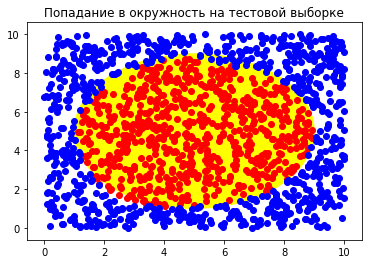

In [11]:
# Отображение тестовых данных
fig, ax = plt.subplots()
reds = []
blues = [] 
for i in range(0,n-1):
    if results[i,0]>0.5:
        reds.append(arr2[i])
    else:
        blues.append(arr2[i])
reds = np.array(reds)
blues = np.array(blues)
circle = plt.Circle((5, 5), 4, color='yellow', zorder=0)
ax.add_artist(circle)
ax.scatter(reds[:,0], reds[:,1], color='red')
ax.scatter(blues[:,0], blues[:,1], color='blue')


ax.set(title='Попадание в окружность на тестовой выборке')
plt.show()